In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd

In [ ]:
url="https://bikekharido.in/used-bikes-in-india/"
url

'https://bikekharido.in/used-bikes-in-india/'

In [ ]:
page=requests.get(url)

In [ ]:
page

<Response [200]>

In [ ]:
soup=BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script>
var gform;gform||(document.addEventListener("gform_main_scripts_loaded",function(){gform.scriptsLoaded=!0}),window.addEventListener("DOMContentLoaded",function(){gform.domLoaded=!0}),gform={domLoaded:!1,scriptsLoaded:!1,initializeOnLoaded:function(o){gform.domLoaded&&gform.scriptsLoaded?o():!gform.domLoaded&&gform.scriptsLoaded?window.addEventListener("DOMContentLoaded",o):document.addEventListener("gform_main_scripts_loaded",o)},hooks:{action:{},filter:{}},addAction:function(o,n,r,t){gform.addHook("action",o,n,r,t)},addFilter:function(o,n,r,t){gform.addHook("filter",o,n,r,t)},doAction:function(o){gform.doHook("action",o,arguments)},applyFilters:function(o){return gform.doHook("filter",o,arguments)},removeAction:function(o,n){gform.removeHook("action",o,n)},removeFilter:function(o,n,r){

In [ ]:
for i in soup.find_all("div",class_="fl-post-text"):
    print(i.text)



2023 Yezdi Roadster


    	By admin
 | 
    	January 27, 2025
    




Seller Demand 
₹ 1,65,000





KM Driven
10000 km


Ownership
First


Location
Delhi






2019 Royal Enfield Thunderbird 350 ABS


    	By admin
 | 
    	January 27, 2025
    




Seller Demand 
₹ 1,10,000





KM Driven
40000 km


Ownership
Second


Location
Noida






2022 Hero Electric Optima CX Dual Battery


    	By admin
 | 
    	January 23, 2025
    




Seller Demand 
₹ 80,000





KM Driven
5000 km


Ownership
First


Location
Kolkata






2015 Mahindra Gusto DX


    	By admin
 | 
    	January 22, 2025
    




Seller Demand 
₹ 17,000





KM Driven
35000 km


Ownership
First


Location
Mumbai






2014 Honda CB Trigger DLX


    	By admin
 | 
    	January 22, 2025
    




Seller Demand 
₹ 45,000





KM Driven
30000 km


Ownership
First


Location
Mumbai






2023 Honda SP 125


    	By admin
 | 
    	January 20, 2025
    




Seller Demand 
₹ 85,000





KM Driven
5000 km


Ownership
First


Loca

In [ ]:
Year=[]
for i in soup.find_all("h2",class_="fl-post-title-old bikeListHead"):
    text = i.text

    regex = re.findall("\d{4}",text)
    if regex:
        Year.append(regex[0])
    else:
        Year.append(np.nan)

In [ ]:
Year

['2023',
 '2019',
 '2022',
 '2015',
 '2014',
 '2023',
 '2021',
 '2022',
 '2017',
 '2021',
 '2021',
 '2021',
 '2023',
 '2019',
 '2022',
 '2015',
 '2014',
 '2023',
 '2021',
 '2022',
 '2017',
 '2021',
 '2021',
 '2021']

In [ ]:
Manufacture_name=[]
for i in soup.find_all("h2",class_="fl-post-title-old bikeListHead"):
    text = i.text

    regex = re.findall("([A-Za-z]+\s)",text)
    if regex:
        Manufacture_name.append(regex[0])
    else:
        Manufacture_name.append(np.nan)

In [ ]:
Manufacture_name

['Yezdi ',
 'Royal ',
 'Hero ',
 'Mahindra ',
 'Honda ',
 'Honda ',
 'Royal ',
 'Royal ',
 'Honda ',
 'KTM ',
 'Suzuki ',
 'Suzuki ',
 'Yezdi ',
 'Royal ',
 'Hero ',
 'Mahindra ',
 'Honda ',
 'Honda ',
 'Royal ',
 'Royal ',
 'Honda ',
 'KTM ',
 'Suzuki ',
 'Suzuki ']

In [ ]:
#soup.find_all("h2",class_="fl-post-title-old bikeListHead")[0].text.split()[2]

In [ ]:
model_name=[]
for i in soup.find_all("h2", class_="fl-post-title-old bikeListHead"):
    name_parts = i.text.split()[2:4]
    model_name.append(' '.join(name_parts))

In [ ]:
model_name

['Roadster',
 'Enfield Thunderbird',
 'Electric Optima',
 'Gusto DX',
 'CB Trigger',
 'SP 125',
 'Enfield Interceptor',
 'Enfield Bullet',
 'CB Hornet',
 '200 Duke',
 'Gixxer SF',
 'Burgman Street',
 'Roadster',
 'Enfield Thunderbird',
 'Electric Optima',
 'Gusto DX',
 'CB Trigger',
 'SP 125',
 'Enfield Interceptor',
 'Enfield Bullet',
 'CB Hornet',
 '200 Duke',
 'Gixxer SF',
 'Burgman Street']

In [ ]:
soup.find_all("h2",class_="fl-post-title-old bikeListHead")[5].text.split()[3]

'125'

In [ ]:
Engine_Features= []

for i in soup.find_all("h2", class_="fl-post-title-old bikeListHead"):
    # Extract parts from index 4 onwards and join them into a string
    engine_parts = i.text.split()[4:]
    Engine_Features.append(' '.join(engine_parts) if engine_parts else '')

In [ ]:
len(Engine_Features)

24

In [ ]:
Seller_Demand = []
for i in soup.find_all("div",class_="fl-post-column"):
    Seller_Demand.append(i.find("span",class_="fw500 spanblock fsize17 fcblack").text)

In [ ]:
len(Seller_Demand)

24

In [ ]:
KM_Driven = []
for i in soup.find_all("div",class_="fl-post-column"):
    text = i.find("span",class_="boxlabel imptags").text
    regex = re.findall("^\d{5}\s*km$",text)
    if regex:
        KM_Driven.append(regex[0])
    else:
        KM_Driven.append(np.nan)

In [ ]:
len(KM_Driven)

24

In [ ]:
ownership = []
location = []
for i in soup.find_all("span", class_="boxlabel imptags"):
    text = i.get_text(strip=True)

    if re.match(r'^(First|Second)$', text):
        ownership.append(text)
    elif not re.search(r'\d+ km$', text):
        location.append(text)

In [ ]:
len(ownership)

24

In [ ]:
location

['Delhi',
 'Noida',
 'Kolkata',
 'Mumbai',
 'Mumbai',
 'Noida',
 'Bangalore',
 'Bangalore',
 'Pune',
 'Bangalore',
 'Bangalore',
 'Purnia',
 'Delhi',
 'Noida',
 'Kolkata',
 'Mumbai',
 'Mumbai',
 'Noida',
 'Bangalore',
 'Bangalore',
 'Pune',
 'Bangalore',
 'Bangalore',
 'Purnia']

In [ ]:
len(location)

24

In [ ]:
d={"Year":Year,
   "Manufacture_name":Manufacture_name,
   "Model_name":model_name,
   "Engine_Features":Engine_Features,
   "Seller_Demand":Seller_Demand,
   "KM_Driven":KM_Driven,
   "Ownership":ownership,
   "Location":location}

In [ ]:
df=pd.DataFrame(d)

In [ ]:
df

,Year,Manufacture_name,Model_name,Engine_Features,Seller_Demand,KM_Driven,Ownership,Location
0,2023,Yezdi,Roadster,,"₹ 1,65,000",10000 km,First,Delhi
1,2019,Royal,Enfield Thunderbird,350 ABS,"₹ 1,10,000",40000 km,Second,Noida
2,2022,Hero,Electric Optima,CX Dual Battery,"₹ 80,000",NaN,First,Kolkata
3,2015,Mahindra,Gusto DX,,"₹ 17,000",35000 km,First,Mumbai
4,2014,Honda,CB Trigger,DLX,"₹ 45,000",30000 km,First,Mumbai
5,2023,Honda,SP 125,,"₹ 85,000",NaN,First,Noida
6,2021,Royal,Enfield Interceptor,650 Ravishing Red,"₹ 2,40,000",10000 km,First,Bangalore
7,2022,Royal,Enfield Bullet,350 X Electric Start,"₹ 1,75,000",15000 km,First,Bangalore
8,2017,Honda,CB Hornet,160R BS4 Special Edition CBS,"₹ 60,000",33000 km,First,Pune
9,2021,KTM,200 Duke,STD 2018 – 2020,"₹ 1,60,000",30000 km,First,Bangalore


In [ ]:
df.to_csv("bikes-24.csv")

In [ ]:
Year=[]
Manufacture_name=[]
model_name=[]
Engine_Features= []
Seller_Demand = []
KM_Driven = []
ownership = []
location = []
for i in range(1,50):
    urls="""https://bikekharido.in/used-bikes-in-india/?sf_paged="""+str(i)
    for i in soup.find_all("h2",class_="fl-post-title-old bikeListHead"):
        text = i.text

        regex = re.findall("\d{4}",text)
        if regex:
            Year.append(regex[0])
        else:
            Year.append(np.nan)

    for i in soup.find_all("h2",class_="fl-post-title-old bikeListHead"):
        text = i.text

        regex = re.findall("([A-Za-z]+\s)",text)
        if regex:
            Manufacture_name.append(regex[0])
        else:
            Manufacture_name.append(np.nan)


    for i in soup.find_all("h2", class_="fl-post-title-old bikeListHead"):
        name_parts = i.text.split()[2:4]
        model_name.append(' '.join(name_parts))



    for i in soup.find_all("h2", class_="fl-post-title-old bikeListHead"):
        # Extract parts from index 4 onwards and join them into a string
        engine_parts = i.text.split()[4:]
        Engine_Features.append(' '.join(engine_parts) if engine_parts else '')

    for i in soup.find_all("div",class_="fl-post-column"):
        Seller_Demand.append(i.find("span",class_="fw500 spanblock fsize17 fcblack").text)


    for i in soup.find_all("div",class_="fl-post-column"):
        text = i.find("span",class_="boxlabel imptags").text
        regex = re.findall("^\d{5}\s*km$",text)
        if regex:
            KM_Driven.append(regex[0])
        else:
            KM_Driven.append(np.nan)

    for i in soup.find_all("span", class_="boxlabel imptags"):
        text = i.get_text(strip=True)

        if re.match(r'^(First|Second)$', text):
            ownership.append(text)
        elif not re.search(r'\d+ km$', text):
            location.append(text)

In [ ]:
d2={"Year":Year,
   "Manufacture_name":Manufacture_name,
   "Model_name":model_name,
   "Engine_Features":Engine_Features,
   "Seller_Demand":Seller_Demand,
   "KM_Driven":KM_Driven,
   "Ownership":ownership,
   "Location":location}

In [ ]:
df2=pd.DataFrame(d2)

In [ ]:
df2

,Year,Manufacture_name,Model_name,Engine_Features,Seller_Demand,KM_Driven,Ownership,Location
0,2023,Yezdi,Roadster,,"₹ 1,65,000",10000 km,First,Delhi
1,2019,Royal,Enfield Thunderbird,350 ABS,"₹ 1,10,000",40000 km,Second,Noida
2,2022,Hero,Electric Optima,CX Dual Battery,"₹ 80,000",NaN,First,Kolkata
3,2015,Mahindra,Gusto DX,,"₹ 17,000",35000 km,First,Mumbai
4,2014,Honda,CB Trigger,DLX,"₹ 45,000",30000 km,First,Mumbai
...,...,...,...,...,...,...,...,...
1171,2022,Royal,Enfield Bullet,350 X Electric Start,"₹ 1,75,000",15000 km,First,Bangalore
1172,2017,Honda,CB Hornet,160R BS4 Special Edition CBS,"₹ 60,000",33000 km,First,Pune
1173,2021,KTM,200 Duke,STD 2018 – 2020,"₹ 1,60,000",30000 km,First,Bangalore
1174,2021,Suzuki,Gixxer SF,250 Moto GP BS6,"₹ 1,25,000",25000 km,Second,Bangalore


In [ ]:
df2.to_csv("bikes-1176.csv")

# Data Cleaning

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              1176 non-null   object
 1   Manufacture_name  1176 non-null   object
 2   Model_name        1176 non-null   object
 3   Engine_Features   1176 non-null   object
 4   Seller_Demand     1176 non-null   object
 5   KM_Driven         980 non-null    object
 6   Ownership         1176 non-null   object
 7   Location          1176 non-null   object
dtypes: object(8)
memory usage: 73.6+ KB


In [ ]:
df2["Engine_Features"].unique()

array(['', '350 ABS', 'CX Dual Battery', 'DLX', '650 Ravishing Red',
       '350 X Electric Start', '160R BS4 Special Edition CBS',
       'STD 2018 – 2020', '250 Moto GP BS6', 'EX'], dtype=object)

In [ ]:
df2['Year']=df2['Year'].astype("int")

In [ ]:
df2['Seller_Demand'][0].replace("₹ ","").replace(",","")

'165000'

In [ ]:
df2['Seller_Demand'] = [i.replace("₹","").replace(",","") for i in df2['Seller_Demand']]

In [ ]:
df2['Seller_Demand'] = df2['Seller_Demand'].astype("int")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              1176 non-null   int32 
 1   Manufacture_name  1176 non-null   object
 2   Model_name        1176 non-null   object
 3   Engine_Features   1176 non-null   object
 4   Seller_Demand     1176 non-null   int32 
 5   KM_Driven         980 non-null    object
 6   Ownership         1176 non-null   object
 7   Location          1176 non-null   object
dtypes: int32(2), object(6)
memory usage: 64.4+ KB


In [ ]:
# Convert to string, remove 'KM' (case-insensitive), commas, and strip spaces
df2['KM_Driven'] = df2['KM_Driven'].astype(str) \
                                   .str.replace('km', '', case=False) \
                                   .str.replace(',', '', regex=False) \
                                   .str.strip()

# Remove any non-numeric characters (keep only digits)
df2['KM_Driven'] = df2['KM_Driven'].str.extract('(\d+)', expand=False)

# Convert to numeric, coercing errors to NaN
df2['KM_Driven'] = pd.to_numeric(df2['KM_Driven'], errors='coerce')

# Optional: Drop rows where conversion failed
df2 = df2.dropna(subset=['KM_Driven'])

# Convert to integer if needed
df2['KM_Driven'] = df2['KM_Driven'].astype(int)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4304\3714664450.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['KM_Driven'] = df2['KM_Driven'].astype(int)


In [ ]:
# Replace empty strings with NaN, then fill NaN with 0
df2['Engine_Features'] = df2['Engine_Features'].replace('', pd.NA).fillna(0)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4304\4103424975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Engine_Features'] = df2['Engine_Features'].replace('', pd.NA).fillna(0)


In [ ]:
df2

,Year,Manufacture_name,Model_name,Engine_Features,Seller_Demand,KM_Driven,Ownership,Location
0,2023,Yezdi,Roadster,0,165000,10000,First,Delhi
1,2019,Royal,Enfield Thunderbird,350 ABS,110000,40000,Second,Noida
3,2015,Mahindra,Gusto DX,0,17000,35000,First,Mumbai
4,2014,Honda,CB Trigger,DLX,45000,30000,First,Mumbai
6,2021,Royal,Enfield Interceptor,650 Ravishing Red,240000,10000,First,Bangalore
...,...,...,...,...,...,...,...,...
1171,2022,Royal,Enfield Bullet,350 X Electric Start,175000,15000,First,Bangalore
1172,2017,Honda,CB Hornet,160R BS4 Special Edition CBS,60000,33000,First,Pune
1173,2021,KTM,200 Duke,STD 2018 – 2020,160000,30000,First,Bangalore
1174,2021,Suzuki,Gixxer SF,250 Moto GP BS6,125000,25000,Second,Bangalore


# Data Visualization

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt


In [ ]:
df2["Manufacture_name"].nunique()

6

In [ ]:
df2["Manufacture_name"].value_counts()

Royal        294
Honda        196
Suzuki       196
Yezdi         98
Mahindra      98
KTM           98
Name: Manufacture_name, dtype: int64

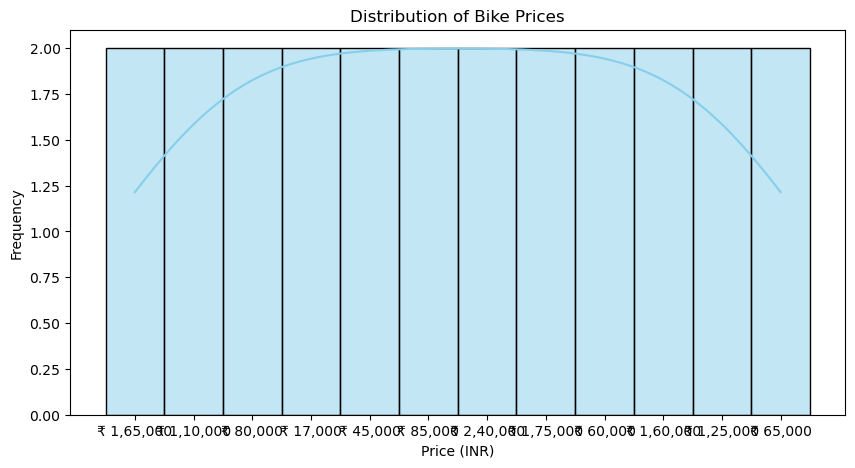

In [ ]:
#Price Distribution
#Purpose: To observe how bike prices are distributed (e.g., are most bikes affordable or premium?).
plt.figure(figsize=(10, 5))
sns.histplot(df['Seller_Demand'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Bike Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()


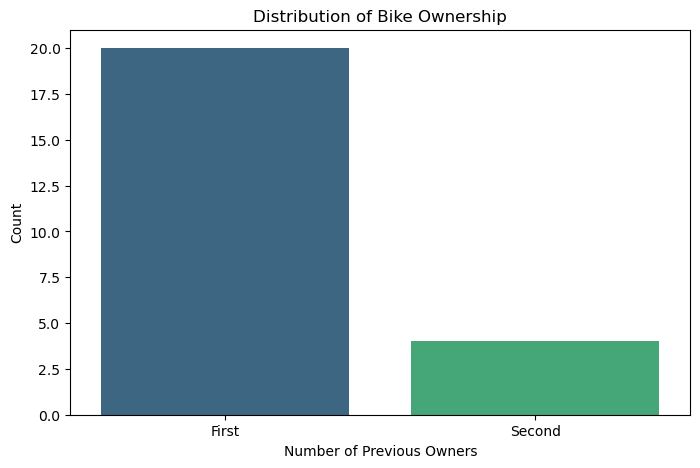

In [ ]:
#Ownership Count
#Purpose: To see how many bikes are first-hand, second-hand, etc.

plt.figure(figsize=(8, 5))
sns.countplot(x='Ownership', data=df, palette='viridis')
plt.title('Distribution of Bike Ownership')
plt.xlabel('Number of Previous Owners')
plt.ylabel('Count')
plt.show()


<Axes: >

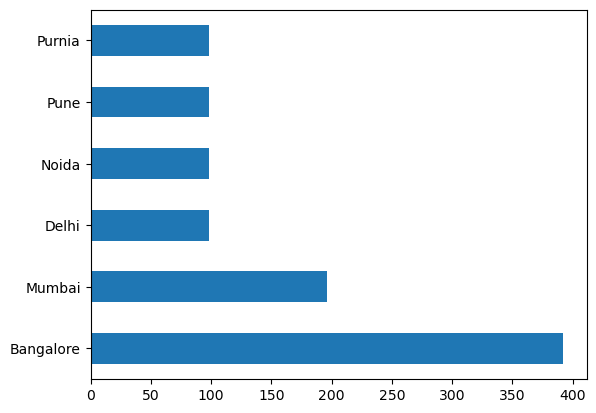

In [ ]:
df2['Location'].value_counts().plot(kind='barh')

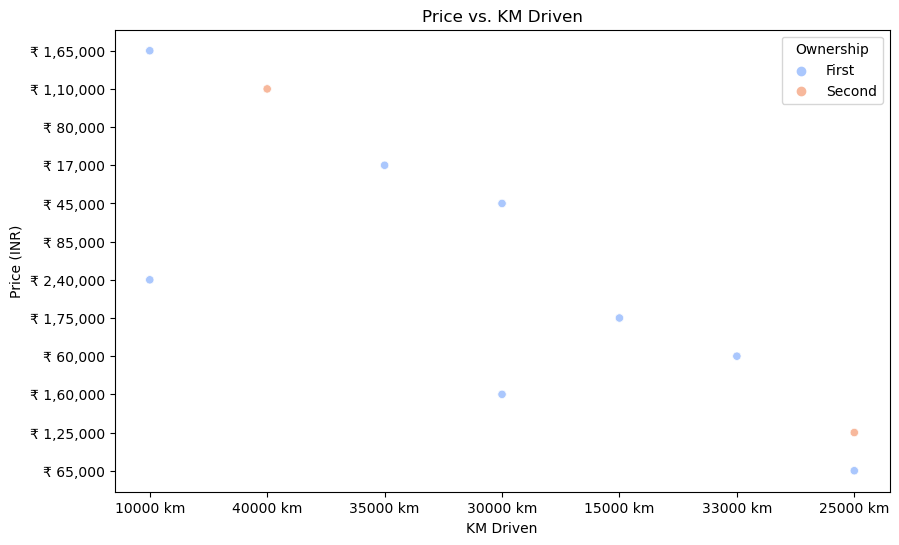

In [ ]:
#2. Bivariate Analysis (Analyzing Relationships Between Two Features)

#Bivariate analysis helps examine relationships or correlations between two variables.
#Price vs. KM Driven
#Purpose: To understand how mileage impacts bike pricing.


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='KM_Driven', y='Seller_Demand', hue='Ownership', palette='coolwarm')
plt.title('Price vs. KM Driven')
plt.xlabel('KM Driven')
plt.ylabel('Price (INR)')
plt.show()


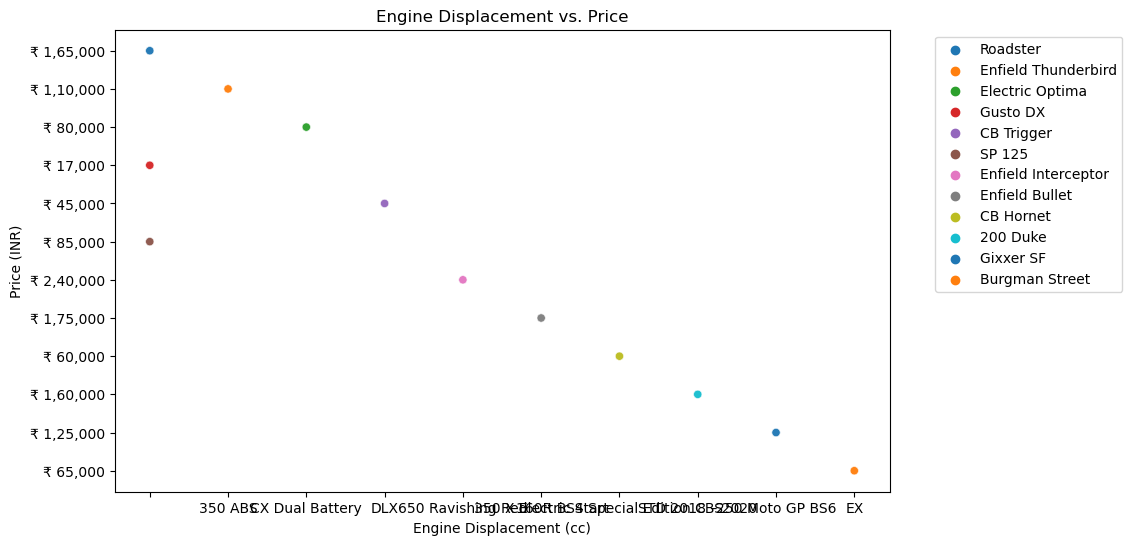

In [ ]:
#Engine Displacement vs. Price
#Purpose: To identify if bikes with larger engines cost significantly more.


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine_Features', y='Seller_Demand', hue='Model_name', palette='tab10', alpha=0.8)
plt.title('Engine Displacement vs. Price')
plt.xlabel('Engine Displacement (cc)')
plt.ylabel('Price (INR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


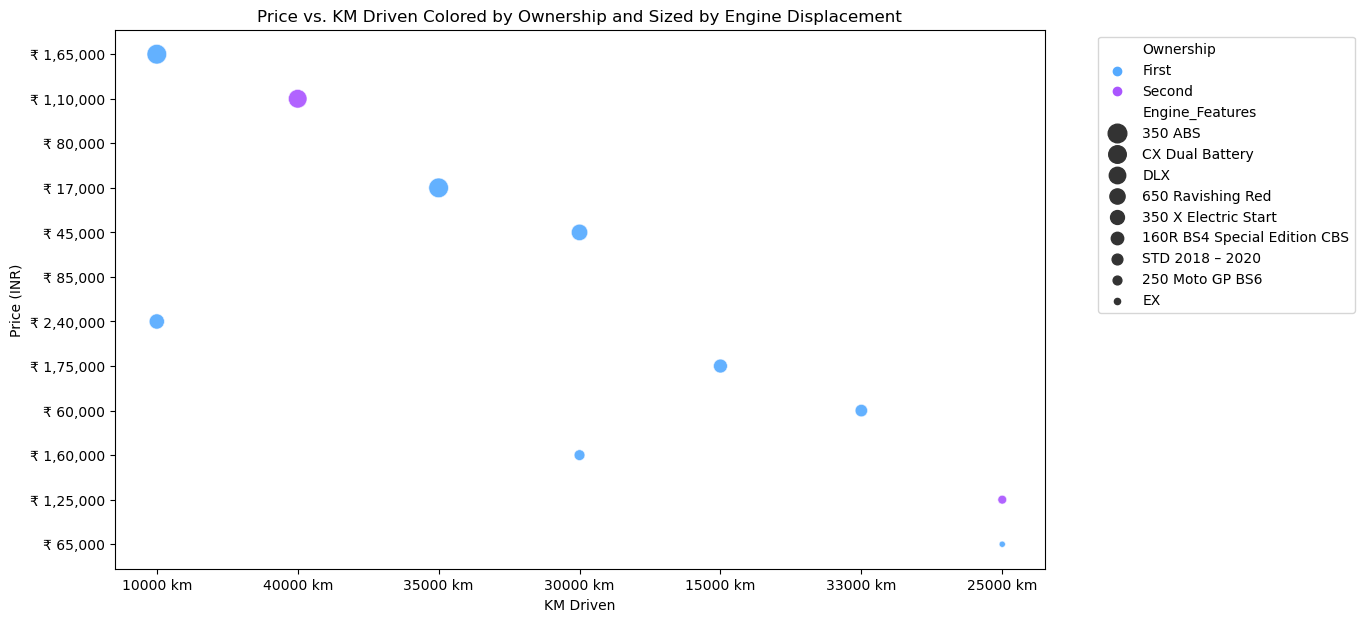

In [ ]:
#3. Multivariate Analysis (Analyzing More Than Two Features Together)

#Multivariate analysis helps uncover deeper patterns when multiple variables interact.

#Price, KM Driven, and Ownership (Bubble Plot)
#Purpose: To simultaneously visualize how Price varies with KM Driven and Ownership.


plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='KM_Driven', y='Seller_Demand', size='Engine_Features', hue='Ownership', alpha=0.7, palette='cool', sizes=(20, 200))
plt.title('Price vs. KM Driven Colored by Ownership and Sized by Engine Displacement')
plt.xlabel('KM Driven')
plt.ylabel('Price (INR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


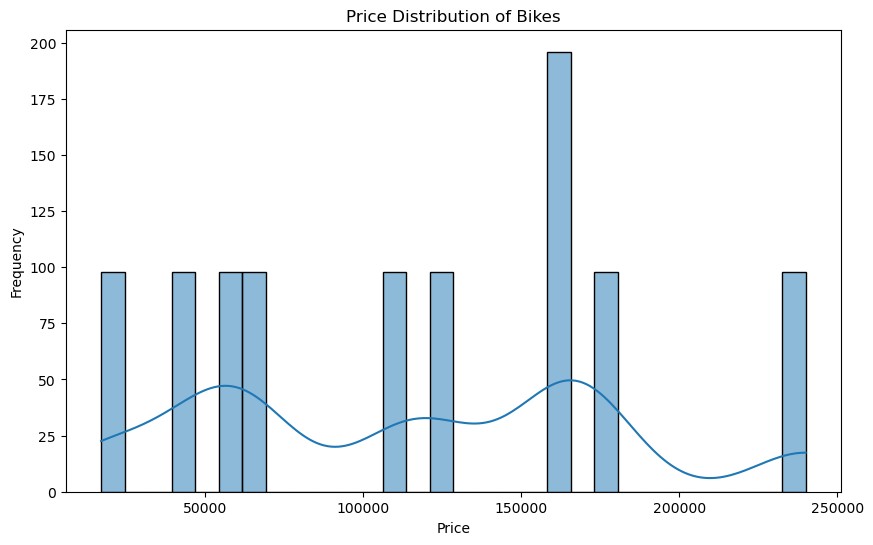

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Seller_Demand'], kde=True, bins=30)
plt.title('Price Distribution of Bikes')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
#Explanation: This helps to understand the distribution of bike prices, so you can easily differentiate expensive bikes for rich buyers and affordable bikes for budget-conscious buyers.

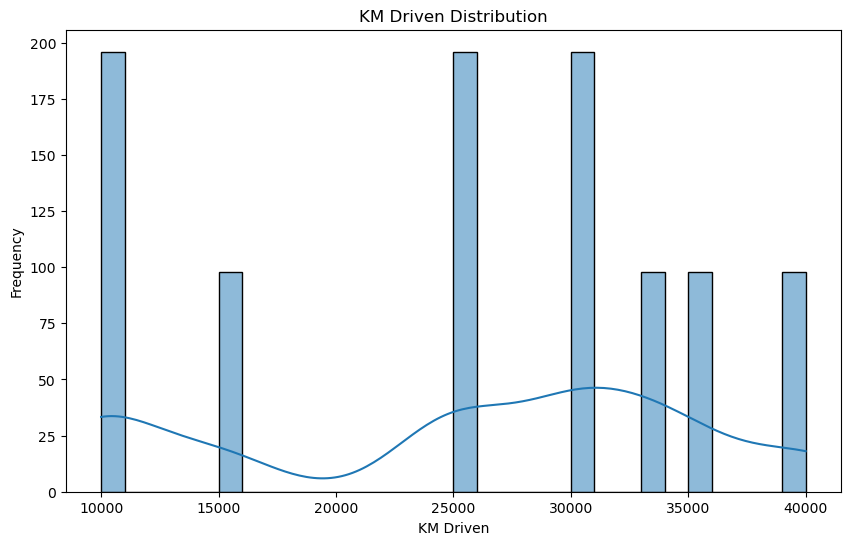

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['KM_Driven'], kde=True, bins=30)
plt.title('KM Driven Distribution')
plt.xlabel('KM Driven')
plt.ylabel('Frequency')
plt.show()
#Explanation: This will help to see how mileage is spread out across all bikes. You can determine which bikes have higher mileage and which are relatively new or low-mileage.

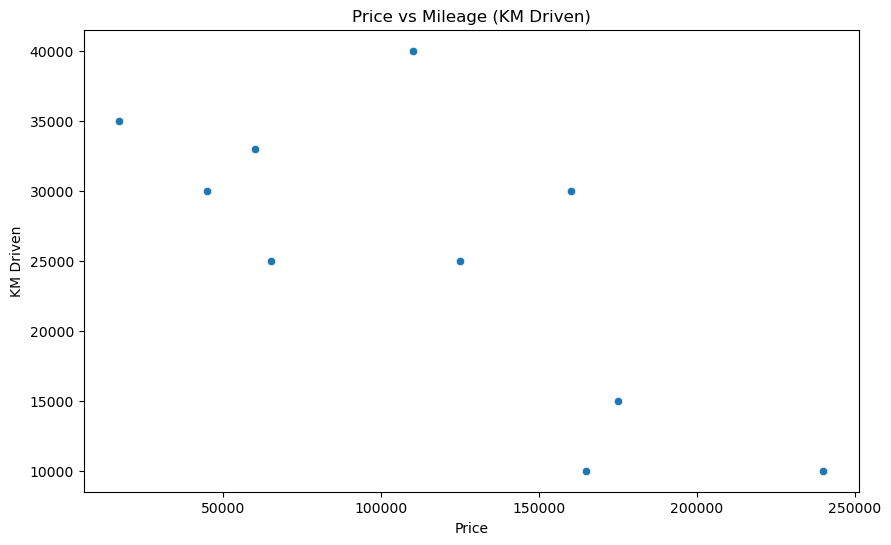

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seller_Demand', y='KM_Driven', data=df2)
plt.title('Price vs Mileage (KM Driven)')
plt.xlabel('Price')
plt.ylabel('KM Driven')
plt.show()
#Explanation: This scatter plot helps you understand if more expensive bikes generally have higher mileage or if there’s no clear relationship.

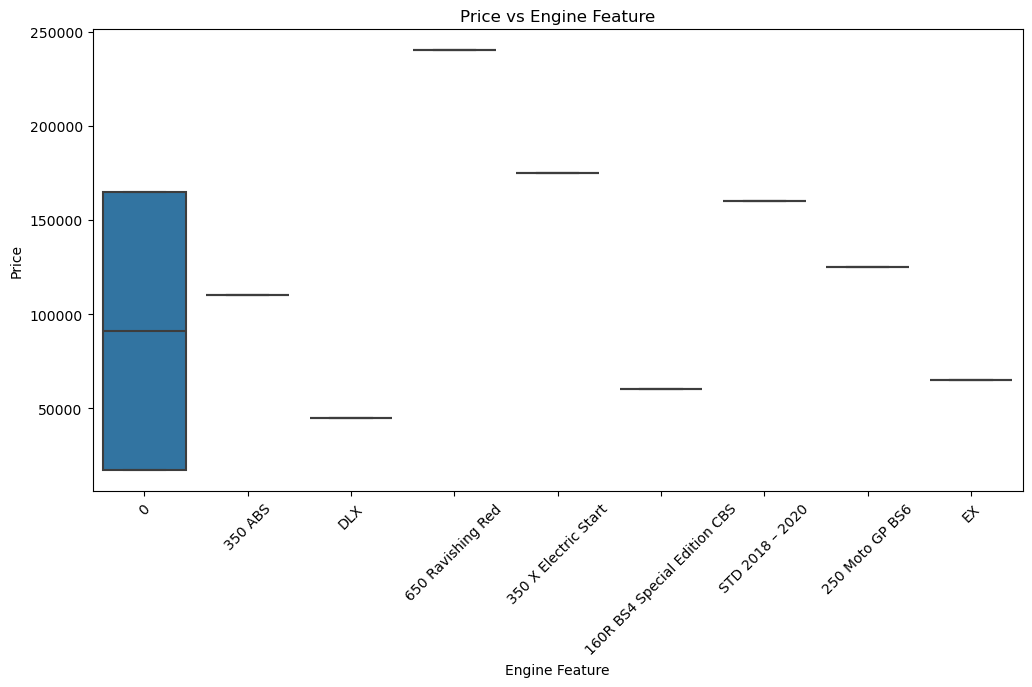

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine_Features', y='Seller_Demand', data=df2)
plt.title('Price vs Engine Feature')
plt.xlabel('Engine Feature')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
#Explanation: This box plot will give you an idea of how the engine feature correlates with price. Some engine features like "Electric" or "V8" might be more expensive than others

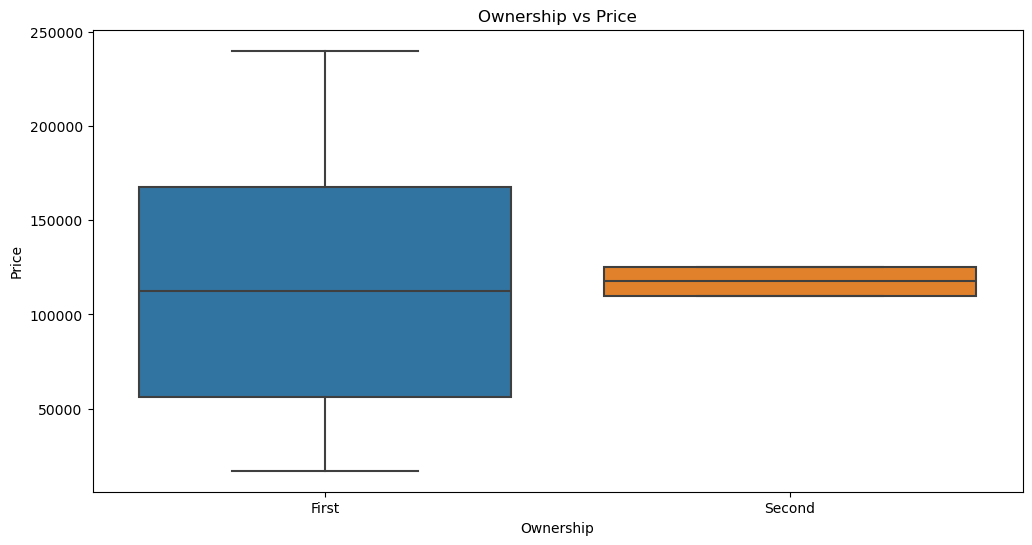

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ownership', y='Seller_Demand', data=df2)
plt.title('Ownership vs Price')
plt.xlabel('Ownership')
plt.ylabel('Price')
plt.show()
#Explanation: This box plot will show how the number of owners correlates with price. Typically, first-owner bikes may have higher prices than second-hand bikes.

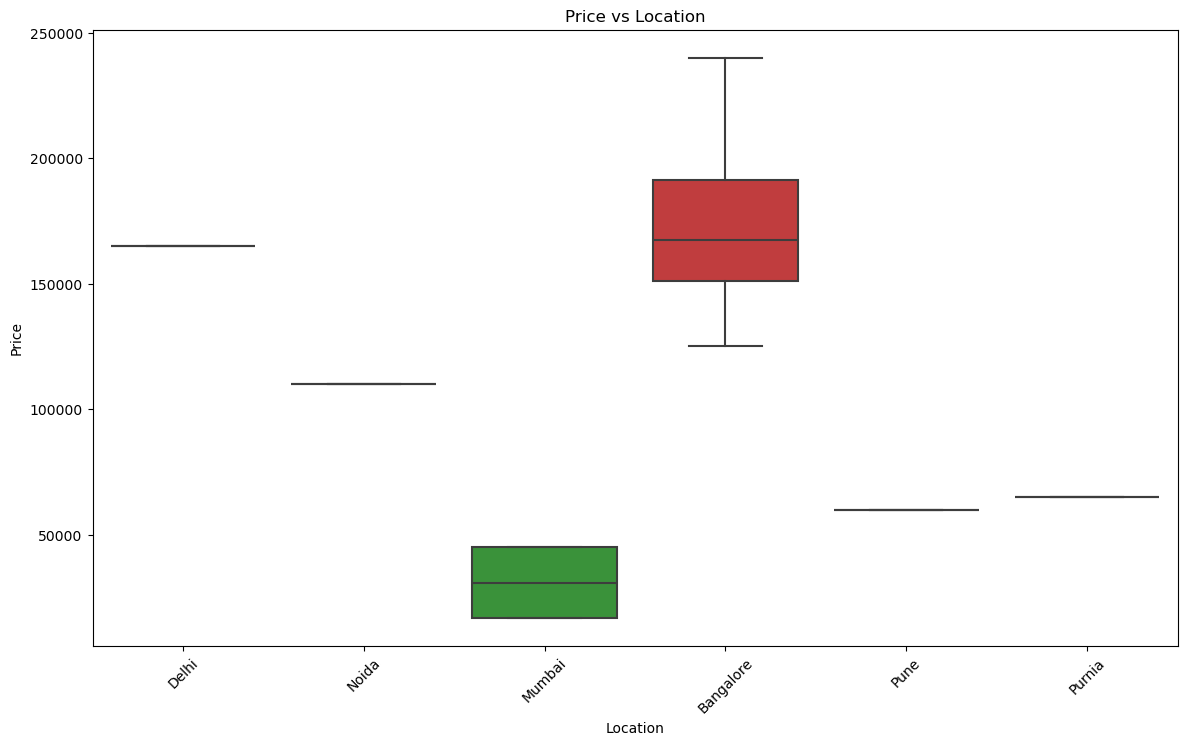

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Seller_Demand', data=df2)
plt.title('Price vs Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
#Explanation: This plot helps determine if bikes in different locations have varying prices. Certain regions may have higher demand or premium brands, which would make them more expensive.

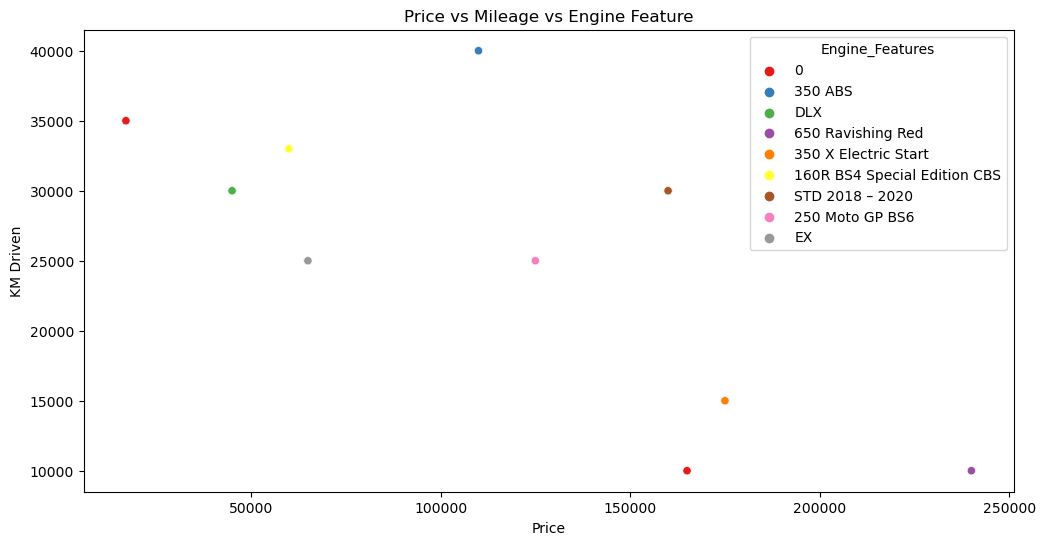

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Seller_Demand', y='KM_Driven', hue='Engine_Features', data=df2, palette='Set1')
plt.title('Price vs Mileage vs Engine Feature')
plt.xlabel('Price')
plt.ylabel('KM Driven')
plt.show()
#Explanation: This scatter plot with a hue will help you see if certain engine features are associated with higher price or mileage.


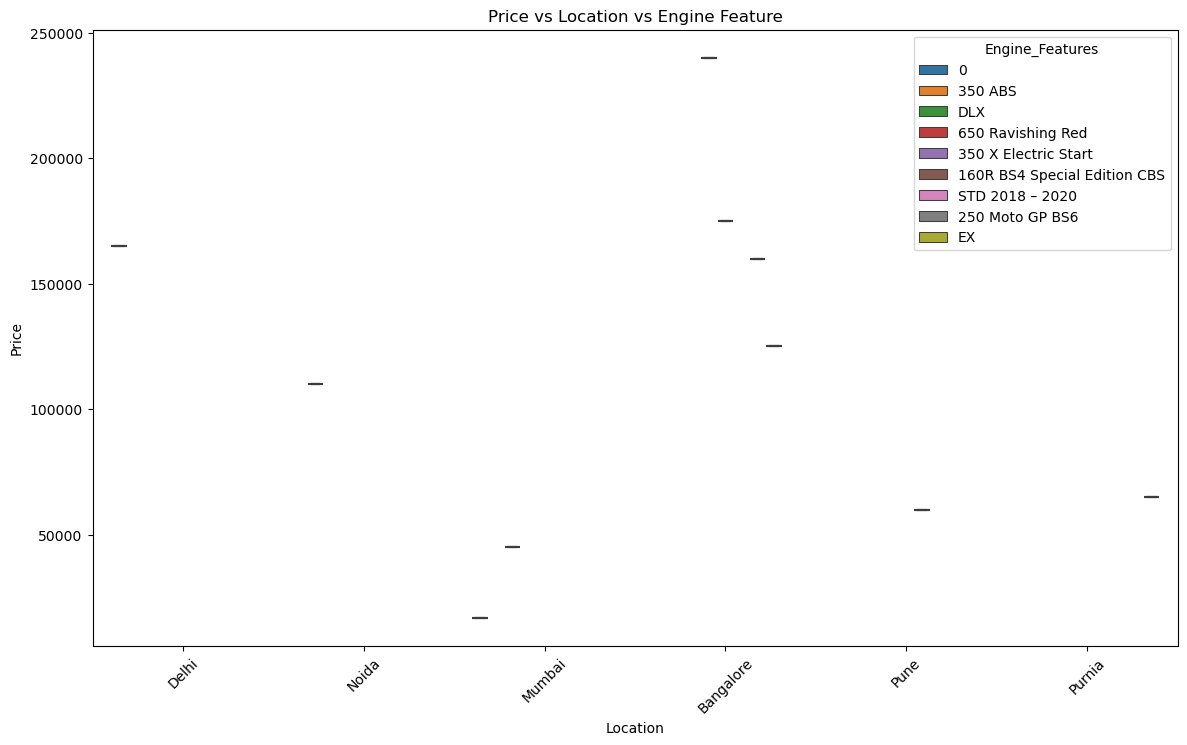

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Seller_Demand', hue='Engine_Features', data=df2)
plt.title('Price vs Location vs Engine Feature')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
#Explanation: This box plot will show how location and engine type interact to affect price. It will help understand regional pricing trends based on engine features.

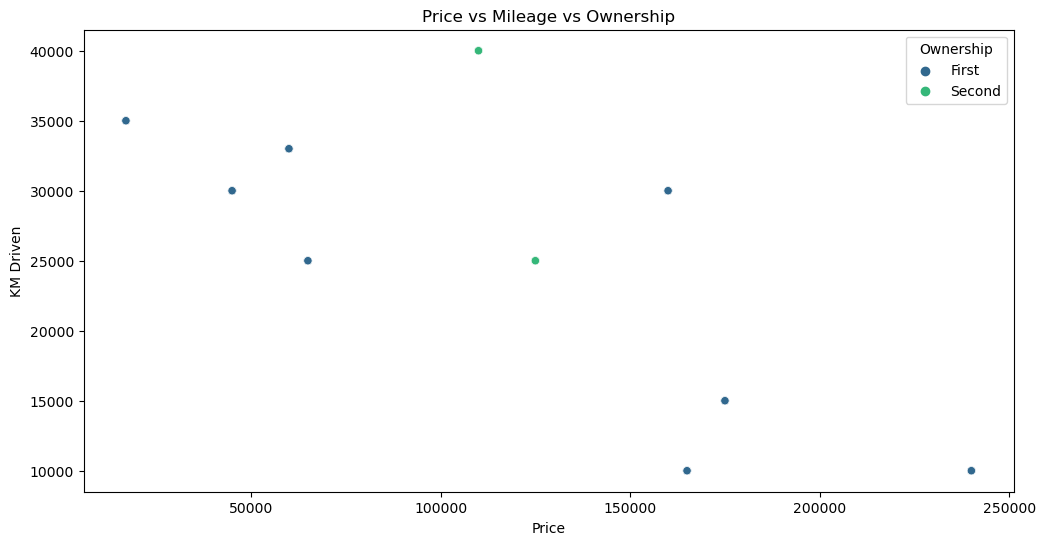

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Seller_Demand', y='KM_Driven', hue='Ownership', data=df2, palette='viridis')
plt.title('Price vs Mileage vs Ownership')
plt.xlabel('Price')
plt.ylabel('KM Driven')
plt.show()
#Explanation: This scatter plot will help see if first-owner bikes tend to have better mileage and higher prices.

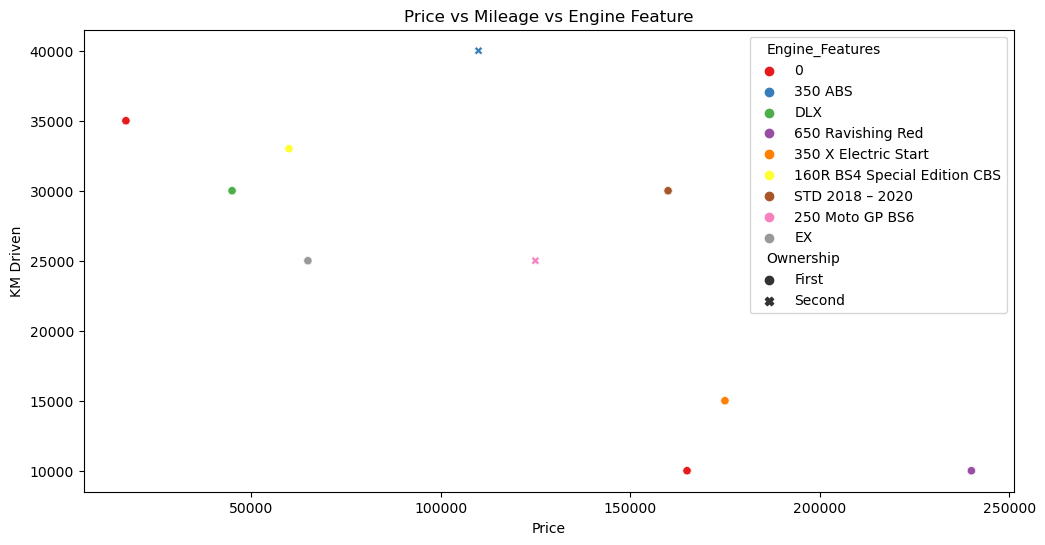

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Seller_Demand', y='KM_Driven', hue='Engine_Features', style='Ownership', data=df2, palette='Set1')
plt.title('Price vs Mileage vs Engine Feature')
plt.xlabel('Price')
plt.ylabel('KM Driven')
plt.show()
#Explanation: This scatter plot will show how engine features affect price and mileage, with an additional differentiation by ownership status.

<Axes: xlabel='Seller_Demand', ylabel='Count'>

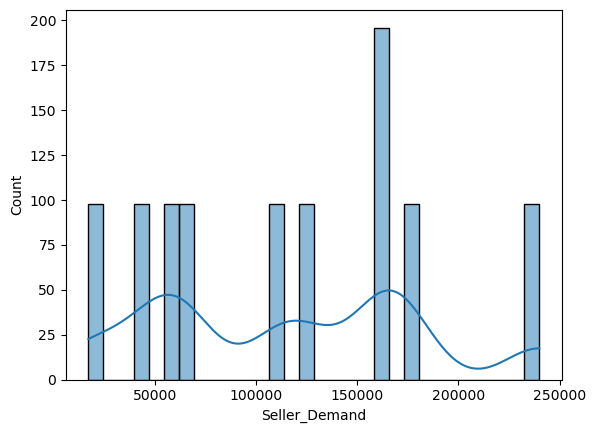

In [ ]:
# Visualize different aspects of the dataset (as shown above)
sns.histplot(df2['Seller_Demand'], kde=True, bins=30)  # Price Distribution


<Axes: xlabel='Seller_Demand', ylabel='KM_Driven'>

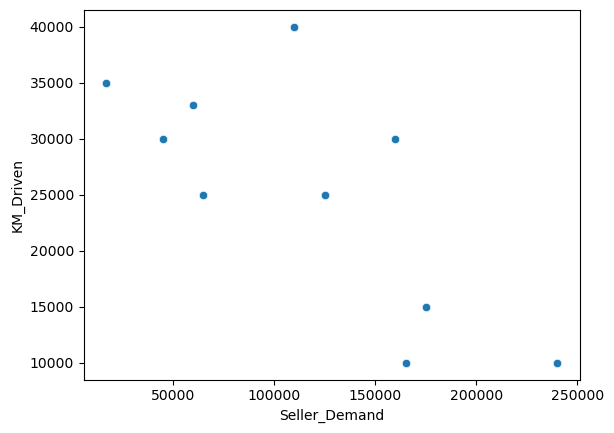

In [ ]:
sns.scatterplot(x='Seller_Demand', y='KM_Driven', data=df2)  # Price vs KM Driven

<Axes: xlabel='Engine_Features', ylabel='Seller_Demand'>

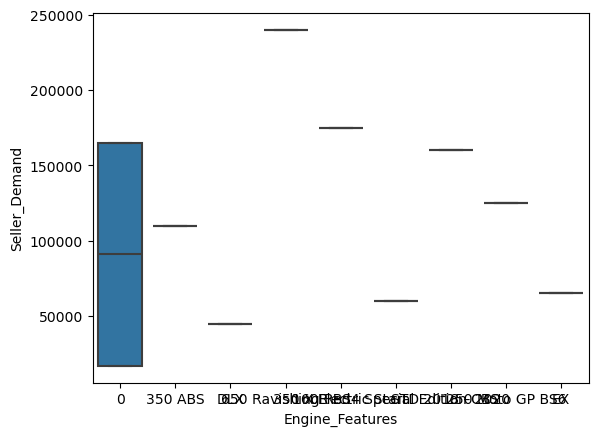

In [ ]:
sns.boxplot(x='Engine_Features', y='Seller_Demand', data=df2)  # Price vs Engine Feature

<Axes: xlabel='Seller_Demand', ylabel='KM_Driven'>

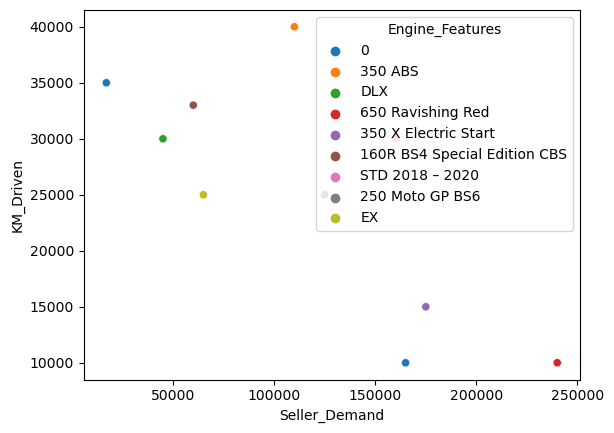

In [ ]:
sns.scatterplot(x='Seller_Demand', y='KM_Driven', hue='Engine_Features', data=df2)  # Price vs KM Driven vs Engine Feature